# 사용할 데이터 불러오기
 * fashion_mnist
    - 의류 이미지
    - 10개의 범주
    - gray scale
    - 28 * 28

In [3]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

#데이터의 수 확인하기
* 학습 데이터 수 6만개
* 테스트 데이터 수 1만개


In [3]:
print(len(train_X), len(test_X))

60000 10000


# 이미지 확인
* cmap = '' 을 통해 이미지의 출력 색상 선택
* plt.colorbar() : 우측에 색상값의 정보를 바(bar)형태로 출력
  * 이미지가 0 ~ 255의 값을 가지는 28X28 크기의 이미지차원이라는 것을 확인
* print(train_Y[3]) 로 확인한 결과, 이 이미지는 **3번 드레스**


0. 티셔츠/상의
1. 바지
2. 스웨터
3. 드레스
4. 코트
5. 샌들
6. 셔츠
7. 운동화
8. 가방
9. 부츠

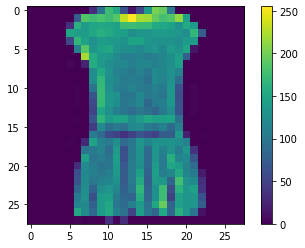

정답 범주 :  3


In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_X[3])
plt.colorbar()
plt.show()

print("정답 범주 : ",train_Y[3])

# 데이터 정규화 이전의 [이미지 픽셀 행렬]

In [5]:
print(train_X[3])

[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 10

#  Min-Max Normalization 데이터 정규화 작업
+ 최소-최대 정규화는 데이터를 정규화하는 가장 일반적인 방법.
+ 모든 feature에 대해 각각의 최소값 0, 최대값 1.
+ 모든 값들을 0 과 1 사이의 값으로 변환.

* (X - MIN) / (MAX-MIN) 
    * 바로 위의 작업을 통해 이미지의 최소값은 0, 최대값은 255 임을 확인
    * ( X - 0 ) / ( 255 - 0 )

In [6]:
#정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [7]:
#모든 데이터가 0과 1사이의 값을 갖기 때문에 정규화 성공
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

# 다층 퍼셉트론 신경망 구축
+ Flatten : 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순레이어
* input_shape -> 원본 데이터의 크기를 입력(28X28)
* Dense 레이어 -> 완전 연결 레이어
* 마지막 레이어의 units값 -> 10. 즉 정답 범주의 수와 동일.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# 컴파일 단계
 * Adam의 기본값 : lr = 0.0001
 * 희소행렬 : 대부분이 값이 0인 행렬
    * ex) [0,0,0,0,0,0,1], [0,0,0,1,0,0,0,0]
    * 대부분이 0이므로 자원 낭비
 * spares_categorical_crossentropy : 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능.



In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 신경망 학습 단계

증가되는 훈련 데이터의 정확도와 달리 검증 데이터의 정확도는 거의 유지됨

In [10]:
history = model.fit(train_X,train_Y,
                    epochs = 500, 
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 2s 2ms/step - loss: 0.5198 - accuracy: 0.8166 - val_loss: 0.4105 - val_accuracy: 0.8564

# 정확도 및 손실값에 대한 결과 시각화 
* 검증데이터와 학습데이터 비교
    * 훈련 데이터는 전체적으로 학습이 잘되지만, 검증데이터는 값이 튄다.
* 과적합 혹은 과소적합 확인


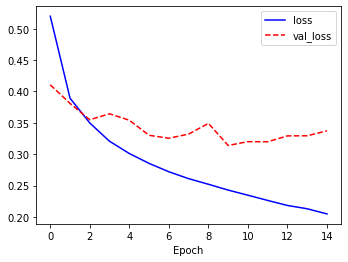

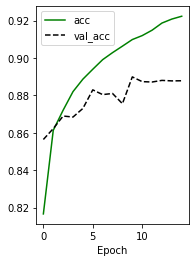

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 최종 평가
* evaluate() : 최종 정확도 및 손실값 확인
    * 0.88정도

In [12]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 754us/step - loss: 0.3646 - accuracy: 0.8792


[0.3645699918270111, 0.8791999816894531]

# 예측
* predict() : 학습된 신경망을 활용하여 예측을 수행
    * 2범주인 스웨터를 잘 예측함(값이 제일 높음)
0. 티셔츠/상의
1. 바지
2. 스웨터
3. 드레스
4. 코트
5. 샌들
6. 셔츠
7. 운동화
8. 가방
9. 부츠

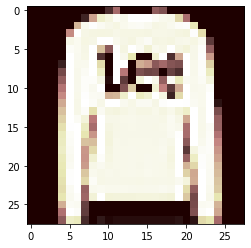

[[1.0000905 1.        1.9984978 1.        1.0012108 1.        1.000201
  1.        1.        1.       ]]
예측 수행 범주 : 2


In [17]:
#예측 수행
pred_X = model.predict(test_X[[1]])
#예측 이미지 확인 
plt.imshow(test_X[1], cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)
print("예측 수행 범주 :",test_Y[1])

------

# 합성곱 신경망을 활용한 이미지 판별
 * 실험 1. 합성곱 계층만 사용한 경우
 * 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용한 경우 
 * 실험 3. VGGNet 스타일 구축
 * 실험 4. VGGNet + 이미지 보강 

* 합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수 )
* reshape() : 기존 3차원 에서 채널이 추가된 4차원 형태로 차원 변경 

In [18]:
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


# 분류 대상 이미지 및 범주 확인  
###### plt.subplot(4,4,i+1) : (행,열, 순서)
######  plt.imshow(train_X[i].reshape(28,28), cmap='pink') 
###### : reshape(28,28)을 통해 기존의 4차원에서 다시 2차원으로 변경하여 이미지 출력

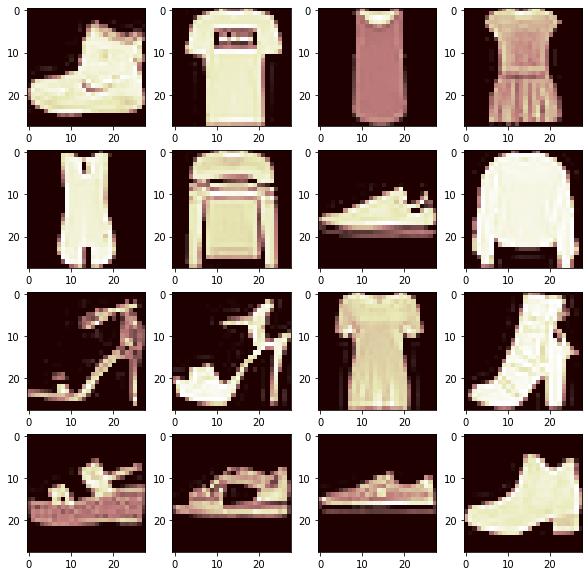

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_X[i].reshape(28,28), cmap='pink')

plt.show()
print(train_Y[:16])

# 실험 1. 합성곱 계층만 사용   
* 풀링 레이어 없이, 단순 합성곱 계층만 활용
* tf.keras.layers.Conv2D()
 * input_shape : 입력 이미지의 크기 및 채널
 * kernel_size : 커널 사이즈 
 * filters : 몇 개의 필터를 생성할 것 인지 
 * strides : 건너뛰기 (기본값 (1,1))
 * padding : 패딩 방식(기본값 'valid')
* tf.keras.layers.Flatten() : 다차원 레이어를 1차원으로 펼쳐준다.

In [20]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계 

In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

# 신경망 학습 단계 
* GPU로 설정하여 수행하는 것을 권해드립니다. 


In [23]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 113s 81ms/step - loss: 0.4743 - accuracy: 0.8290 - val_loss: 0.3905 - val_accuracy: 0.8582

KeyboardInterrupt: 

# 정확도 및 손실값에 대한 결과 시각화 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론의 결과       loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용한 결과  loss: 0.5002 - accuracy: 0.8683

In [ ]:
model.evaluate(test_X,test_Y)

# 실험 2. 합성곱, 풀링, 드랍아웃 사용    
* 최대치 풀링 : tf.keras.layers.MaxPool2D() 
 * strides : 건너뛰기
 * pool size : 풀링 사이즈 설정 - 기본값 : (2,2) 
* 평균치 풀링 : tf.keras.layers.AveragePool2D()
* 드랍아웃 계층 생성 : tf.keras.layers.Dropout() 
 * rate : 이전 계층에서 제외할 뉴런의 비율 설정

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

# 신경망 학습 단계

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

# 정확도 및 손실값에 대한 결과 시각화 

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X,test_Y)

# 최종 평가 
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921

# 실험 3. VGGNet 스타일 적용
# Style Transfer 논문에서도 VGGNet활용 

* VGGNet 스타일 일부 적용
  * 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  * 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  * 완전연결계층 적용 
  * 완전연결계층 적용 
  * 완전연결계층 적용 

###### VGGNet 참고 문헌 : https://arxiv.org/pdf/1709.01921.pdf
###### Style Transfer 참고 문헌 : https://arxiv.org/pdf/1508.06576.pdf

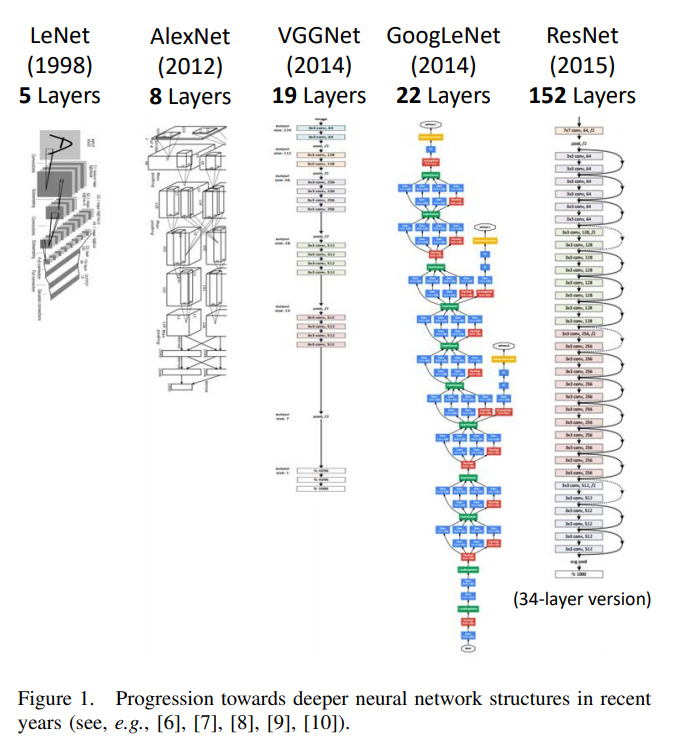

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

# 신경망 학습 단계 

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

# 정확도 및 손실값에 대한 결과 시각화 

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921
* VGGNet스타일 기법 → loss: 0.2306 - accuracy: 0.9175

In [ ]:
model.evaluate(test_X,test_Y)

# 실험 4. VGGNet + 이미지 보강

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이미지 추가 생성 연습
* rotation_range : 이미지 회전값
* zoom_range : 이미지 일부 확대
* shear_range : 이미지 기울기
* width_shift_range : 좌우 이동
* height_shift_range : 상하 이동 
* horizontal_flip : 이미지 가로 뒤집기
* vertical_filp : 이미지 세로 뒤집기 

In [ ]:
#이미지 보강 조건 설정
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)
#한번에 생성할 이미지의 수
augment_size = 100 
#flow()를 통해 실제 보강 이미지 생성 

x_augment = image_generator.flow(x = np.tile(A = train_X[0].reshape(28*28),reps = 100).reshape(-1,28,28,1), #np.tile() : A를 reps에 정해진 형식만큼 반복
                                 y = np.zeros(augment_size), #라벨값은 딱히 줄 필요 없기에 np.zeros() 할당
                                 batch_size = augment_size,  #배치 사이즈 
                                 shuffle = False).next()[0]  #next()로 첫번째 데이터[0]에 대한 실제 값을 꺼내준다. 

In [ ]:
#이미지 보강 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augment[i].reshape(28,28), cmap='pink')
plt.show()

# 이미지 추가 생성
* 훈련 데이터의 50% 추가생성 ( 60000 + 30000 )

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

augment_size = 30000

In [ ]:
# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),batch_size = augment_size, shuffle = False).next()[0]  

In [ ]:
# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제 (중복허용O / 중복허용x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))

In [ ]:
x_augmented_1 = image_generator.flow(x = x_augmented, 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,  
                                 shuffle = False).next()[1]   

In [ ]:
print(x_augmented.shape)
print(x_augmented_1.shape)

In [ ]:
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [ ]:
#데이터 합쳐주기
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))

In [ ]:
#보강 데이터 결합 확인
print(train_X.shape)

# 신경망 모델 생성
* 가장 성능이 좋았던 VGGNet 스타일 적용


In [ ]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
                            tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
                            tf.keras.layers.MaxPool2D(strides = (2,2)),
                            tf.keras.layers.Dropout(rate=0.5),
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
                            tf.keras.layers.MaxPool2D(strides = (2,2)),
                            tf.keras.layers.Dropout(rate=0.5),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=512, activation = 'relu'),
                            tf.keras.layers.Dropout(rate = 0.5),
                            tf.keras.layers.Dense(units=256, activation = 'relu'),
                            tf.keras.layers.Dropout(rate = 0.5),
                            tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 신경망 학습 단계

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10 , monitor = 'val_loss')])

# 정확도 및 손실값에 대한 결과 시각화 

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921
* VGGNet스타일 기법 → loss: 0.2306 - accuracy: 0.9175
* VGGNet + 이미지 보강 → loss: 0.2097 - accuracy: 0.9262

In [ ]:
model.evaluate(test_X,test_Y)

# 예측 수행 

In [ ]:
#예측 수행
pred_X = model.predict(test_X[[10]])
#예측 이미지 확인 
plt.imshow(test_X[10].reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)
print("예측 수행 범주 :",test_Y[10])

In [ ]:
import datetime
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "/content/sample_data" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq = 1)
model.predict(test_X,
              callbacks=[tensorboard_callback])
%load_ext tensorboard
%tensorboard --logdir {log_dir}
